Here we will determine the ground state of two hydrogen atoms as the distance between them varies., this can then be used as a baseplate for future research projects as necessary. Code taken from https://qiskit.github.io/qiskit-aer/getting_started.html. I simply refactored it to make it work iterably.

H .0 .0 .0; H .0 .0 0.1; Time: 2.288818359375e-05 seconds since start
H .0 .0 .0; H .0 .0 0.11836734693877551; Time: 0.11200404167175293 seconds since start
H .0 .0 .0; H .0 .0 0.13673469387755102; Time: 0.17020106315612793 seconds since start


/var/folders/81/jsls3ctx2pq2v1djrvb29bjh0000gn/T/ipykernel_40465/2283112282.py:37: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


H .0 .0 .0; H .0 .0 0.15510204081632656; Time: 0.2317359447479248 seconds since start
H .0 .0 .0; H .0 .0 0.17346938775510207; Time: 0.29229307174682617 seconds since start
H .0 .0 .0; H .0 .0 0.19183673469387758; Time: 0.3490159511566162 seconds since start
H .0 .0 .0; H .0 .0 0.21020408163265308; Time: 0.40619516372680664 seconds since start
H .0 .0 .0; H .0 .0 0.2285714285714286; Time: 0.46665406227111816 seconds since start
H .0 .0 .0; H .0 .0 0.2469387755102041; Time: 0.5264072418212891 seconds since start
H .0 .0 .0; H .0 .0 0.2653061224489796; Time: 0.5846030712127686 seconds since start
H .0 .0 .0; H .0 .0 0.2836734693877551; Time: 0.6411769390106201 seconds since start
H .0 .0 .0; H .0 .0 0.3020408163265306; Time: 0.7008020877838135 seconds since start
H .0 .0 .0; H .0 .0 0.3204081632653062; Time: 0.75901198387146 seconds since start
H .0 .0 .0; H .0 .0 0.3387755102040817; Time: 0.8198409080505371 seconds since start
H .0 .0 .0; H .0 .0 0.3571428571428572; Time: 0.882529020309

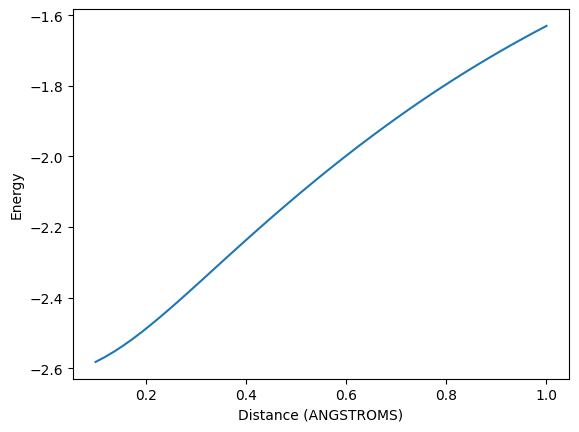

In [8]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
import numpy as np
import time

start = time.time()
end = time.time()
energies = []
distances = np.linspace(0.1,1,50)
for i in distances:
    seconds = end - start
    print(f'H .0 .0 .0; H .0 .0 {i}; Time: {seconds} seconds since start')
    # Use PySCF, a classical computational chemistry software
    # package, to compute the one-body and two-body integrals in
    driver = PySCFDriver(
    atom=f'H .0 .0 .0; H .0 .0 {i}',
    unit=DistanceUnit.ANGSTROM,
    basis='sto3g',
    charge=0,
    spin=0  
)
    problem = driver.run()

# setup the qubit mapper
    from qiskit_nature.second_q.mappers import ParityMapper

    mapper = ParityMapper(num_particles=problem.num_particles)

# setup the classical optimizer for the VQE
    from qiskit_algorithms.optimizers import L_BFGS_B

    optimizer = L_BFGS_B()

# setup the estimator primitive for the VQE
    from qiskit.primitives import Estimator

    estimator = Estimator()

# setup the ansatz for VQE
    from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

    ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

# set up our actual VQE instance
    from qiskit_algorithms import VQE

    vqe = VQE(estimator, ansatz, optimizer)
# ensure that the optimizer starts in the all-zero state which corresponds to
# the Hartree-Fock starting point
    vqe.initial_point = [0] * ansatz.num_parameters

# prepare the ground-state solver and run it
    from qiskit_nature.second_q.algorithms import GroundStateEigensolver

    algorithm = GroundStateEigensolver(mapper, vqe)

    electronic_structure_result = algorithm.solve(problem)
    electronic_structure_result.formatting_precision = 6
    energies.append(electronic_structure_result.groundenergy)
    end = time.time()

#Plotting energies

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(distances, energies)
ax.set_xlabel("Distance (ANGSTROMS)")
ax.set_ylabel("Energy")
plt.draw()

That is for the hydrogen atom, let us try the next element, lithium. Helium doesn't work since we get an error when constructing the atom. 

In [11]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
import numpy as np
import time

start = time.time()
end = time.time()
energies = []
distances = np.linspace(0.1,1,50)
for i in distances:
    seconds = end - start
    print(f'H .0 .0 .0; Li .0 .0 {i}; Time: {seconds} seconds since start')
    # Use PySCF, a classical computational chemistry software
    # package, to compute the one-body and two-body integrals in
    driver = PySCFDriver(
    atom=f'H .0 .0 .0; Li .0 .0 {i}',
    unit=DistanceUnit.ANGSTROM,
    basis='sto3g',
    charge=0,
    spin=0  
)
    problem = driver.run()

# setup the qubit mapper
    from qiskit_nature.second_q.mappers import ParityMapper

    mapper = ParityMapper(num_particles=problem.num_particles)

# setup the classical optimizer for the VQE
    from qiskit_algorithms.optimizers import L_BFGS_B

    optimizer = L_BFGS_B()

# setup the estimator primitive for the VQE
    from qiskit.primitives import Estimator

    estimator = Estimator()

# setup the ansatz for VQE
    from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

    ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

# set up our actual VQE instance
    from qiskit_algorithms import VQE

    vqe = VQE(estimator, ansatz, optimizer)
# ensure that the optimizer starts in the all-zero state which corresponds to
# the Hartree-Fock starting point
    vqe.initial_point = [0] * ansatz.num_parameters

# prepare the ground-state solver and run it
    from qiskit_nature.second_q.algorithms import GroundStateEigensolver

    algorithm = GroundStateEigensolver(mapper, vqe)

    electronic_structure_result = algorithm.solve(problem)
    electronic_structure_result.formatting_precision = 6
    energies.append(electronic_structure_result.groundenergy)
    end = time.time()

#Plotting energies

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(distances, energies)
ax.set_xlabel("Distance (ANGSTROMS)")
ax.set_ylabel("Energy")
plt.draw()

H .0 .0 .0; Li .0 .0 0.1; Time: 1.8835067749023438e-05 seconds since start


/var/folders/81/jsls3ctx2pq2v1djrvb29bjh0000gn/T/ipykernel_40465/603888328.py:37: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


KeyboardInterrupt: 

I think it should be easy to realize why quantum computers are needed for quantum chemistry. For the double hydrogen example, even with a classical computer it took less than a second to get through a single iteration, completing the entire code in less than 5 seconds. With a larger atom combination like lithium for example, is taking multitudes of times longer to complete. I literally went to grab something and within that time it hadn't even completed a single iteration of the code. The lithium atom is just too much to properly work with, and it would take too much time to compute. So thats fun :).

Anyways, as I am due for an explanation, I will give it. 

The `PySCFDriver` takes in information about the atoms you want to simulate. The `atom` should be in the form `{element1} x y z;{element2} x y z...` with ; separating each. This then constructs the atoms to run the simulation. From there we run it to gather the necessary integrals and assign it to a variable. Next we map the problem to qubits using `ParityMapper`. Then we import a classical optimizer for VQE, similar to what was done in the VQE notebook. Then we prep the estimator primitive, the ansazt (UCCSD, which is more tailored toward quantum chemistry to optimize the searchable space). Then we run the VQE function, which takes in the estimator, ansatz, and optimizer. 

From here, we use the result from VQE as a starting point as the energy value is already pretty close to the actual ground state. Thus we can use it to solve for other information about the structure of the atom using `GroundStateEigensolver`. The formating precision simply states how many decimals to display. Then you can use the results to do whatever you please, in my case, graph the energies.